# ML Modeling Process

#### Import libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import statistics

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#### Reading dataset

In [3]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')


#### Preparing Data for ML model processes

In [4]:
# Preparing our data for a machine learning model
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']

In [5]:
# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

#### Baseline models

In [8]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(verbose=-1),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []

}

# Evaluate each model without scaling using the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validation)

    train_score = model.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Train Score'].append(train_score)


# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

LinearRegression()

Lasso()

Ridge()

               Model            MSE        RMSE         MAE  R2 Score  \
0      Random Forest  496462.462821  704.600925  417.498580  0.601775   
1               LGBM  586114.066370  765.580869  475.685254  0.529864   
2            XGBoost  585375.885677  765.098612  466.196530  0.530456   
3  Gradient Boosting  607405.728619  779.362386  505.889100  0.512785   
4  Linear Regression  648813.926653  805.489868  519.927619  0.479571   
5   Lasso Regression  634712.112727  796.688216  518.231162  0.490882   
6   Ridge Regression  642175.332373  801.358429  519.442403  0.484896   

   Train Score  
0     0.942022  
1     0.829947  
2     0.944386  
3     0.618850  
4     0.559673  
5     0.542062  
6     0.555465  


#### Observation:
We tried our Baseline Models and we can see that Random Forest has good results for R2 on Validation but hight Train score. While Gradien Boosting has good fit between R2 and Train score. Among other models this too are my favourites

### Now let's try same models but  with Scalers

In [31]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(verbose=-1),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

# Initialize scalers
scalers = {
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Evaluate each model with different scalers using the validation set
for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        if 'Regression' in model_name:
            model = Pipeline([
                ('scaler', scaler),
                ('model', model)
            ])

        model.fit(X_train, y_train)
        y_pred = model.predict(X_validation)

        train_score = model.score(X_train, y_train)
        mse = mean_squared_error(y_validation, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_validation, y_pred)
        r2 = r2_score(y_validation, y_pred)

        metrics['Model'].append(model_name)
        metrics['Scaler'].append(scaler_name)
        metrics['MSE'].append(mse)
        metrics['RMSE'].append(rmse)
        metrics['MAE'].append(mae)
        metrics['R2 Score'].append(r2)  
        metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', Lasso())])

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', Ridge())])

RandomForestRegressor()

LGBMRegressor(verbose=-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

Pipeline(steps=[('scaler', RobustScaler()), ('model', LinearRegression())])

Pipeline(steps=[('scaler', RobustScaler()), ('model', Lasso())])

Pipeline(steps=[('scaler', RobustScaler()), ('model', Ridge())])

                Model           Scaler           MSE          RMSE  \
0       Random Forest  Standard Scaler  4.915496e+05  7.011060e+02   
1                LGBM  Standard Scaler  5.861141e+05  7.655809e+02   
2             XGBoost  Standard Scaler  5.853759e+05  7.650986e+02   
3   Gradient Boosting  Standard Scaler  6.053886e+05  7.780672e+02   
4   Linear Regression  Standard Scaler  8.358054e+28  2.891030e+14   
5    Lasso Regression  Standard Scaler  6.427688e+05  8.017286e+02   
6    Ridge Regression  Standard Scaler  6.463294e+05  8.039462e+02   
7       Random Forest    MinMax Scaler  4.929735e+05  7.021207e+02   
8                LGBM    MinMax Scaler  5.861141e+05  7.655809e+02   
9             XGBoost    MinMax Scaler  5.853759e+05  7.650986e+02   
10  Gradient Boosting    MinMax Scaler  6.048739e+05  7.777364e+02   
11  Linear Regression    MinMax Scaler  1.283946e+24  1.133113e+12   
12   Lasso Regression    MinMax Scaler  6.303977e+05  7.939759e+02   
13   Ridge Regressio

#### Let's get some visuals

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Model', ylabel='value'>

Text(0.5, 1.0, 'MSE Comparison for Different Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'MSE')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'LGBM'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Linear Regression'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Ridge Regression')])

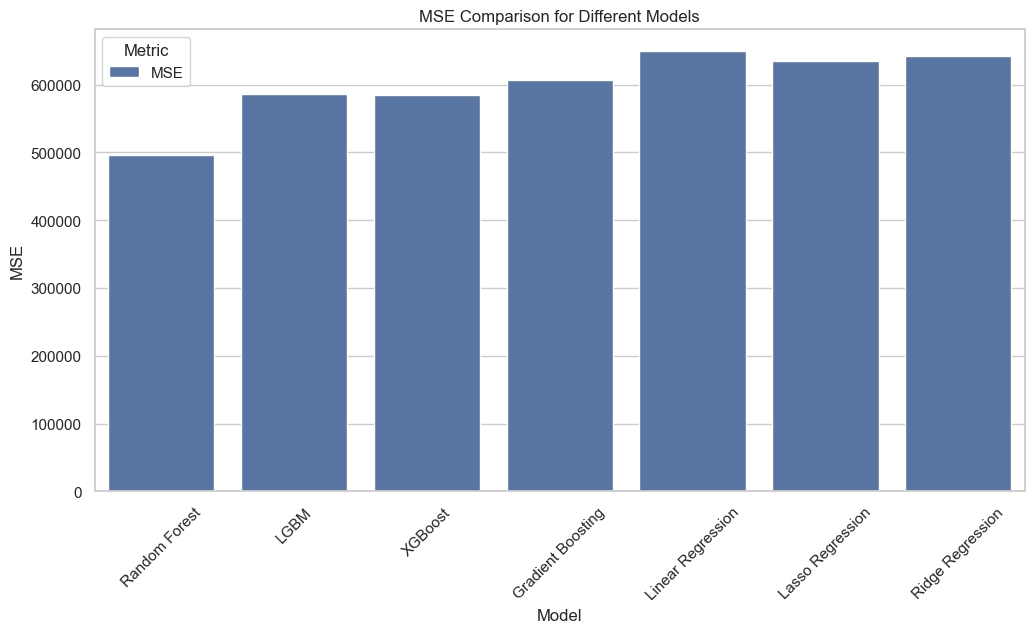

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Model', ylabel='value'>

Text(0.5, 1.0, 'RMSE Comparison for Different Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'RMSE')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'LGBM'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Linear Regression'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Ridge Regression')])

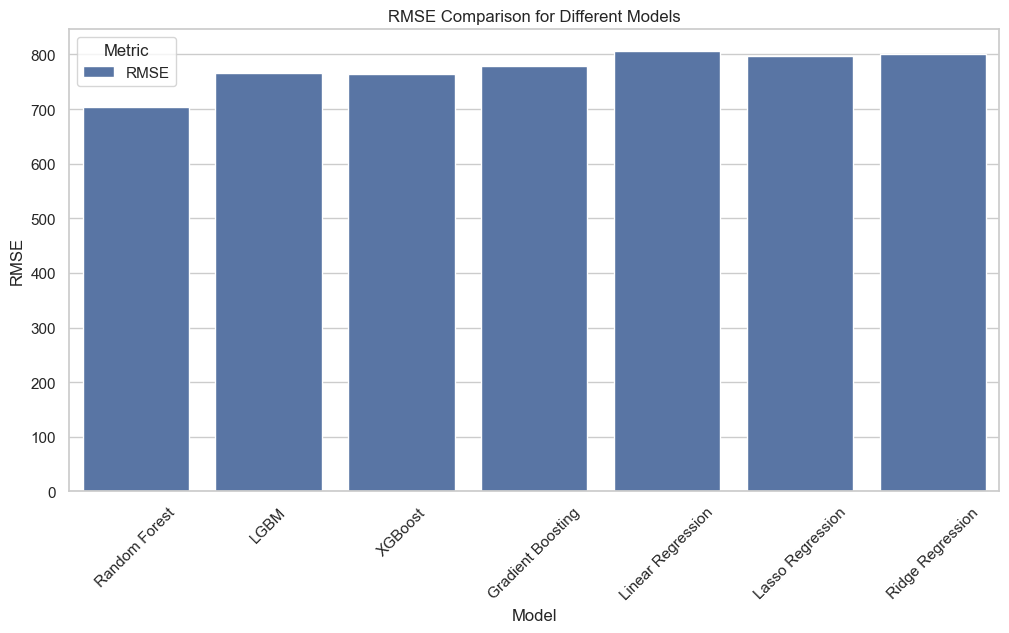

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Model', ylabel='value'>

Text(0.5, 1.0, 'MAE Comparison for Different Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'MAE')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'LGBM'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Linear Regression'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Ridge Regression')])

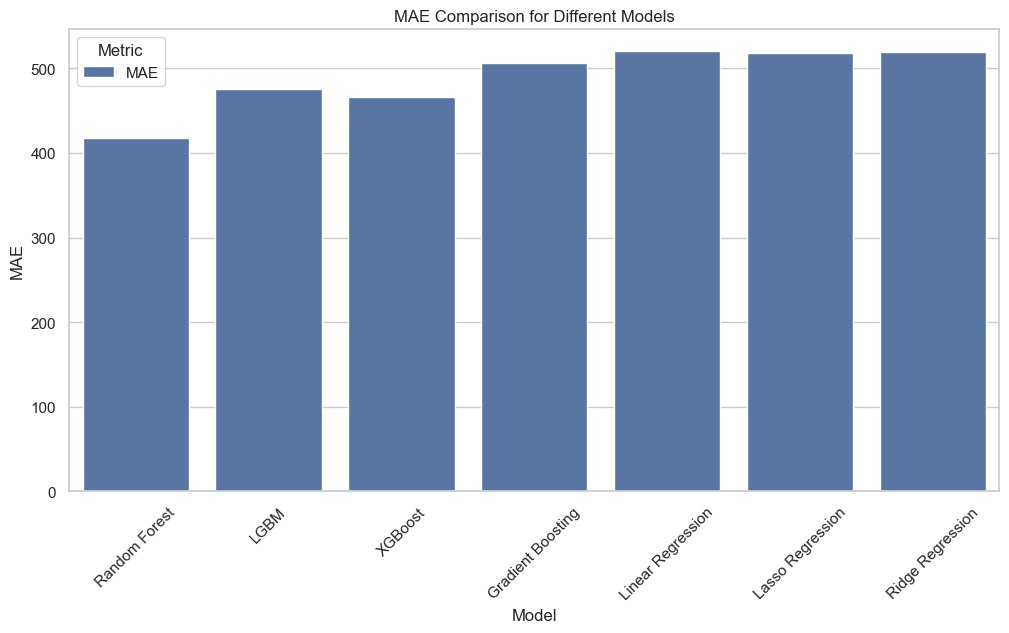

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Model', ylabel='value'>

Text(0.5, 1.0, 'R2 Score Comparison for Different Models')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'R2 Score')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'LGBM'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'Linear Regression'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'Ridge Regression')])

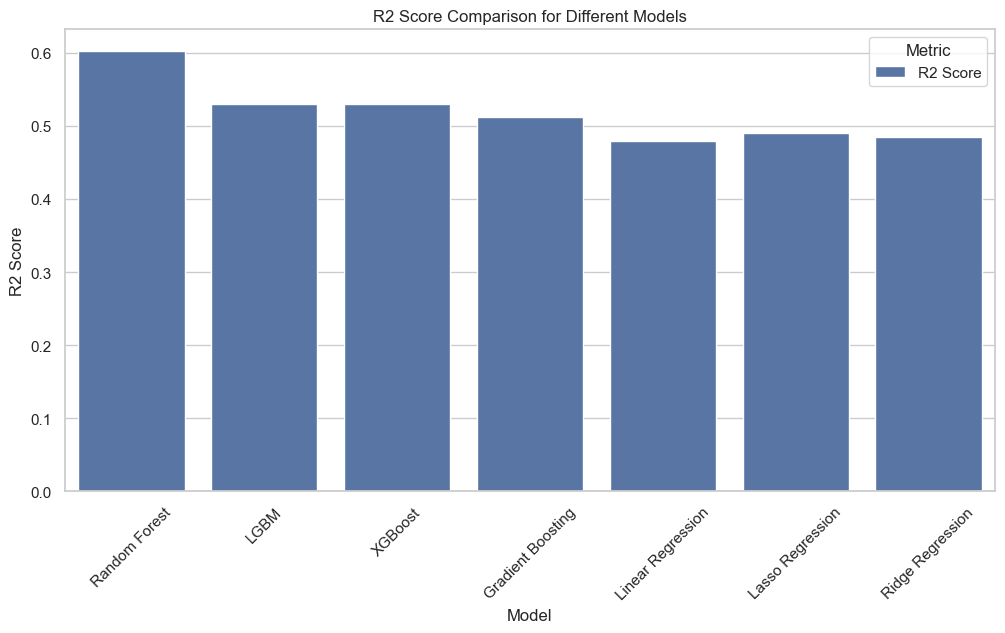

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Melt the DataFrame to long format
melted_metrics_df = pd.melt(metrics_df, id_vars=['Model'], value_vars=['MSE', 'RMSE', 'MAE', 'R2 Score'], var_name='Metric')

# Define the metrics to plot
metrics_to_plot = ['MSE', 'RMSE', 'MAE', 'R2 Score']

# Plot the metrics for each model
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='value', hue='Metric', data=melted_metrics_df[melted_metrics_df['Metric'] == metric])
    plt.title(f'{metric} Comparison for Different Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Metric')
    plt.show()


#### Observation:
We tried cople of Models and with and without Scaling them with different scalers. And we see that Random Forest has good results for R2 on Validation but hight Train score. While Gradien Boosting has good fit between R2 and Train score. Further we will try to tune this models.

### Let's try to fit residuals to Random Forest from Lasso Regression

In [111]:
# Create and fit the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value for regularization strength
lasso_model.fit(X_train, y_train)

# Obtain residuals from Lasso model
lasso_residuals = y_train - lasso_model.predict(X_train)

# Use residuals to train RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, lasso_residuals)

# Make predictions on the validation set
lasso_residuals_validation = y_validation - lasso_model.predict(X_validation)
y_pred_rf = rf_model.predict(X_validation)

# Calculate mean squared error on the validation set
mse_rf = mean_squared_error(y_validation, lasso_model.predict(X_validation) + y_pred_rf)
print(f"Mean Squared Error on Validation Set after Lasso and RandomForest: {mse_rf}")

# Calculate R2 Score
r2_rf = r2_score(y_validation, lasso_model.predict(X_validation) + y_pred_rf)
print(f"R2 Score on Validation Set after Lasso and RandomForest: {r2_rf}")


Lasso(alpha=0.1)

RandomForestRegressor()

Mean Squared Error on Validation Set after Lasso and RandomForest: 556344.8628034703
R2 Score on Validation Set after Lasso and RandomForest: 0.5537423574899555


In [112]:
# Calculate mean squared error on the validation set
mse_rf = mean_squared_error(y_validation, lasso_model.predict(X_validation) + y_pred_rf)
print(f"Mean Squared Error on Validation Set after Lasso and RandomForest: {mse_rf}")

# Calculate R2 Score
r2_rf = r2_score(y_validation, lasso_model.predict(X_validation) + y_pred_rf)
print(f"R2 Score on Validation Set after Lasso and RandomForest: {r2_rf}")

# Calculate Train Score
train_score_rf = rf_model.score(X_train, lasso_residuals)
print(f'Train Score (R-squared) after Lasso and RandomForest: {train_score_rf}')

# Calculate MSE on the training set
y_pred_rf_train = rf_model.predict(X_train)
mse_rf_train = mean_squared_error(y_train, lasso_model.predict(X_train) + y_pred_rf_train)
print(f"Mean Squared Error on Training Set after Lasso and RandomForest: {mse_rf_train}")

Mean Squared Error on Validation Set after Lasso and RandomForest: 556344.8628034703
R2 Score on Validation Set after Lasso and RandomForest: 0.5537423574899555
Train Score (R-squared) after Lasso and RandomForest: 0.8772234219483297
Mean Squared Error on Training Set after Lasso and RandomForest: 75683.04889330066


### Let's try to fit residuals to Gradient Booster from Lasso Regression

In [113]:
# Use residuals to train GradientBoostingRegressor
gb_model_lasso = GradientBoostingRegressor()
gb_model_lasso.fit(X_train, lasso_residuals)

# Make predictions on the validation set
lasso_residuals_validation = y_validation - lasso_model.predict(X_validation)
y_pred_gb_lasso = gb_model_lasso.predict(X_validation)

# Calculate mean squared error on the validation set
mse_gb_lasso = mean_squared_error(y_validation, lasso_model.predict(X_validation) + y_pred_gb_lasso)
print(f"Mean Squared Error on Validation Set after Lasso and GradientBoosting: {mse_gb_lasso}")

# Calculate R2 Score
r2_gb_lasso = r2_score(y_validation, lasso_model.predict(X_validation) + y_pred_gb_lasso)
print(f"R2 Score on Validation Set after Lasso and GradientBoosting: {r2_gb_lasso}")

# Calculate Train Score
train_score_gb_lasso = gb_model_lasso.score(X_train, lasso_residuals)
print(f'Train Score (R-squared) after Lasso and GradientBoosting: {train_score_gb_lasso}')

# Calculate MSE on the training set
y_pred_gb_train_lasso = gb_model_lasso.predict(X_train)
mse_gb_train_lasso = mean_squared_error(y_train, lasso_model.predict(X_train) + y_pred_gb_train_lasso)
print(f"Mean Squared Error on Training Set after Lasso and GradientBoosting: {mse_gb_train_lasso}")


GradientBoostingRegressor()

Mean Squared Error on Validation Set after Lasso and GradientBoosting: 576722.0546354288
R2 Score on Validation Set after Lasso and GradientBoosting: 0.537397320093399
Train Score (R-squared) after Lasso and GradientBoosting: 0.3181011162997823
Mean Squared Error on Training Set after Lasso and GradientBoosting: 420342.2784242409


### Let's try to fit residuals to Random Forest from Ridge Regression

In [28]:
# Create and fit the Ridge model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value for regularization strength
ridge_model.fit(X_train, y_train)

# Obtain residuals from Ridge model
ridge_residuals = y_train - ridge_model.predict(X_train)

# Use residuals to train RandomForestRegressor
rf_model_ridge = RandomForestRegressor()
rf_model_ridge.fit(X_train, ridge_residuals)

# Make predictions on the validation set
ridge_residuals_validation = y_validation - ridge_model.predict(X_validation)
y_pred_rf_ridge = rf_model_ridge.predict(X_validation)

# Calculate mean squared error on the validation set
mse_rf_ridge = mean_squared_error(y_validation, ridge_model.predict(X_validation) + y_pred_rf_ridge)
print(f"Mean Squared Error on Validation Set after Ridge and RandomForest: {mse_rf_ridge}")

# Calculate R2 Score
r2_rf_ridge = r2_score(y_validation, ridge_model.predict(X_validation) + y_pred_rf_ridge)
print(f"R2 Score on Validation Set after Ridge and RandomForest: {r2_rf_ridge}")

# Calculate Train Score
train_score_rf_ridge = rf_model_ridge.score(X_train, ridge_residuals)
print(f'Train Score (R-squared) after Ridge and RandomForest: {train_score_rf_ridge}')

# Calculate MSE on the training set
y_pred_rf_train_ridge = rf_model_ridge.predict(X_train)
mse_rf_train_ridge = mean_squared_error(y_train, ridge_model.predict(X_train) + y_pred_rf_train_ridge)
print(f"Mean Squared Error on Training Set after Ridge and RandomForest: {mse_rf_train_ridge}")


Ridge(alpha=0.1)

RandomForestRegressor()

Mean Squared Error on Validation Set after Ridge and RandomForest: 551008.2664294412
R2 Score on Validation Set after Ridge and RandomForest: 0.5580229702467647
Train Score (R-squared) after Ridge and RandomForest: 0.8726317257384748
Mean Squared Error on Training Set after Ridge and RandomForest: 78117.91570268635


### Let's try to fit residuals to Gradient Booster from Ridge Regression

In [29]:
# Use residuals to train GradientBoostingRegressor
gb_model_ridge = GradientBoostingRegressor()
gb_model_ridge.fit(X_train, ridge_residuals)

# Make predictions on the validation set
ridge_residuals_validation = y_validation - ridge_model.predict(X_validation)
y_pred_gb_ridge = gb_model_ridge.predict(X_validation)

# Calculate mean squared error on the validation set
mse_gb_ridge = mean_squared_error(y_validation, ridge_model.predict(X_validation) + y_pred_gb_ridge)
print(f"Mean Squared Error on Validation Set after Ridge and GradientBoosting: {mse_gb_ridge}")

# Calculate R2 Score
r2_gb_ridge = r2_score(y_validation, ridge_model.predict(X_validation) + y_pred_gb_ridge)
print(f"R2 Score on Validation Set after Ridge and GradientBoosting: {r2_gb_ridge}")

# Calculate Train Score
train_score_gb_ridge = gb_model_ridge.score(X_train, ridge_residuals)
print(f'Train Score (R-squared) after Ridge and GradientBoosting: {train_score_gb_ridge}')

# Calculate MSE on the training set
y_pred_gb_train_ridge = gb_model_ridge.predict(X_train)
mse_gb_train_ridge = mean_squared_error(y_train, ridge_model.predict(X_train) + y_pred_gb_train_ridge)
print(f"Mean Squared Error on Training Set after Ridge and GradientBoosting: {mse_gb_train_ridge}")


GradientBoostingRegressor()

Mean Squared Error on Validation Set after Ridge and GradientBoosting: 576685.7905724089
R2 Score on Validation Set after Ridge and GradientBoosting: 0.5374264083736243
Train Score (R-squared) after Ridge and GradientBoosting: 0.31678443289730607
Mean Squared Error on Training Set after Ridge and GradientBoosting: 419031.94800381665


After fitting residuals to our models we didn't improve our results, morever we had worthe result.

#### Let's try to fit Standart/MinMax/Robust Scalers to our models

In [34]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Initialize scalers
scalers = {
    'No Scaler': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Evaluate each model with different scalers using the validation set
for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # Apply scaler only to models that are not None
        if scaler:
            model = Pipeline([
                ('scaler', scaler),
                ('model', model)
            ])
        else:
            model = models[model_name]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_validation)

        train_score = model.score(X_train, y_train)
        mse = mean_squared_error(y_validation, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_validation, y_pred)
        r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score

        metrics['Model'].append(model_name)
        metrics['Scaler'].append(scaler_name)
        metrics['MSE'].append(mse)
        metrics['RMSE'].append(rmse)
        metrics['MAE'].append(mae)
        metrics['R2 Score'].append(r2)  # Append R2 Score
        metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

GradientBoostingRegressor()

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', RandomForestRegressor())])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', GradientBoostingRegressor())])

Pipeline(steps=[('scaler', RobustScaler()), ('model', RandomForestRegressor())])

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', GradientBoostingRegressor())])

               Model           Scaler            MSE        RMSE         MAE  \
0      Random Forest        No Scaler  494001.171818  702.852169  419.966044   
1  Gradient Boosting        No Scaler  609119.958520  780.461375  506.360347   
2      Random Forest  Standard Scaler  493351.428557  702.389798  417.402785   
3  Gradient Boosting  Standard Scaler  603817.522542  777.056962  504.848487   
4      Random Forest    MinMax Scaler  498468.723066  706.023175  421.108556   
5  Gradient Boosting    MinMax Scaler  606277.692459  778.638358  505.986796   
6      Random Forest    Robust Scaler  498206.743073  705.837618  417.986657   
7  Gradient Boosting    Robust Scaler  602592.605411  776.268385  505.118054   

   R2 Score  Train Score  
0  0.603750     0.943576  
1  0.511410     0.618850  
2  0.604271     0.942685  
3  0.515663     0.618850  
4  0.600166     0.941249  
5  0.513690     0.618850  
6  0.600376     0.942298  
7  0.516646     0.618850  


#### Results:
- Random forest have almost same result with Scalers.
- Gradient Boosting with RobustScaler performs better.

### Lets tune hypperparameters

#### Random Forest First
- We will try to Scale our DataFrame to see if it will help us.

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Initialize scalers
scalers = {
    'No Scaler': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [600, 700, 800],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [10, 15, 20],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Create a pipeline with the Random Forest model
model = Pipeline([
    ('scaler', None), 
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
for scaler_name, scaler in scalers.items():
    # Set the scaler in the pipeline
    model.set_params(scaler=scaler)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model_rf = grid_search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model_rf.predict(X_validation)

    # Calculate metrics
    train_score = best_model_rf.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    # Append metrics to the dictionary
    metrics['Model'].append('Random Forest (Tuned)')
    metrics['Scaler'].append(scaler_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


Pipeline(steps=[('scaler', None), ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [10, 15, 20],
                         'model__n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error')

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [10, 15, 20],
                         'model__n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error')

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [10, 15, 20],
                         'model__n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error')

Pipeline(steps=[('scaler', RobustScaler()), ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [10, 15, 20],
                         'model__n_estimators': [600, 700, 800]},
             scoring='neg_mean_squared_error')

                   Model           Scaler            MSE        RMSE  \
0  Random Forest (Tuned)        No Scaler  701628.771633  837.632838   
1  Random Forest (Tuned)  Standard Scaler  702747.747177  838.300511   
2  Random Forest (Tuned)    MinMax Scaler  698792.588023  835.938148   
3  Random Forest (Tuned)    Robust Scaler  702706.895029  838.276145   

          MAE  R2 Score  Train Score  
0  555.800206  0.491209     0.812320  
1  556.303200  0.490398     0.810895  
2  554.377007  0.493266     0.813378  
3  553.592120  0.490427     0.812991  


In [55]:
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 800}


RandomForest with MinMaxScaler gives as best result. Ss it has lower gap between R2 on validation and train 

###### Let's try tune each of hyperparameters. 

In [56]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Initialize scalers
scalers = {
    'No Scaler': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [700, 750, 800],
    'model__max_depth': [None],
    'model__min_samples_split': [10],
    'model__min_samples_leaf': [1],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model
model = Pipeline([
    ('scaler', None),  # Placeholder for the scaler
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning only with MinMaxScaler
scaler_name = 'MinMax Scaler'
scaler = scalers[scaler_name]

# Set the scaler in the pipeline
model.set_params(scaler=scaler)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['Scaler'].append(scaler_name)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)



Pipeline(steps=[('scaler', MinMaxScaler()), ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [1],
                         'model__min_samples_split': [10],
                         'model__n_estimators': [700, 750, 800]},
             scoring='neg_mean_squared_error')

                   Model         Scaler            MSE        RMSE  \
0  Random Forest (Tuned)  MinMax Scaler  699868.896134  836.581673   

          MAE  R2 Score  Train Score  
0  554.882952  0.492485     0.812198  
Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 800}


##### Scalers with tuned hyperparameters.

In [57]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Initialize scalers
scalers = {
    'No Scaler': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [700, 750, 800],
    'model__max_depth': [None],
    'model__min_samples_split': [15],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model
model = Pipeline([
    ('scaler', None),  # Placeholder for the scaler
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning only with MinMaxScaler
scaler_name = 'MinMax Scaler'
scaler = scalers[scaler_name]

# Set the scaler in the pipeline
model.set_params(scaler=scaler)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['Scaler'].append(scaler_name)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)



Pipeline(steps=[('scaler', MinMaxScaler()), ('model', RandomForestRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [15],
                         'model__n_estimators': [700, 750, 800]},
             scoring='neg_mean_squared_error')

                   Model         Scaler            MSE        RMSE  \
0  Random Forest (Tuned)  MinMax Scaler  719821.124334  848.422727   

          MAE  R2 Score  Train Score  
0  562.488911  0.478017     0.731578  
Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 15, 'model__n_estimators': 750}


##### Now we will try to run with and without bootstrap parameter
- the bootstrap parameter is a Boolean parameter that determines whether bootstrap samples should be used when building trees. 

In [61]:
# Initialize Random Forest models
rf_model_with_bootstrap = RandomForestRegressor(bootstrap=True, random_state=42)
rf_model_without_bootstrap = RandomForestRegressor(bootstrap=False, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [400, 500, 600],
    'model__max_depth': [None],
    'model__min_samples_split': [15],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt']
}

# Create pipelines with the Random Forest models and MinMaxScaler
pipeline_with_bootstrap = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model_with_bootstrap)
])

pipeline_without_bootstrap = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model_without_bootstrap)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Bootstrap': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Loop through each bootstrap scenario
for bootstrap_flag, pipeline in zip([True, False], [pipeline_with_bootstrap, pipeline_without_bootstrap]):
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    best_model_rf = grid_search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model_rf.predict(X_validation)

    # Calculate metrics
    train_score = best_model_rf.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    # Append metrics to the dictionary
    metrics['Model'].append('Random Forest (Tuned)')
    metrics['Bootstrap'].append(bootstrap_flag)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Train Score'].append(train_score)

    # Print the best hyperparameters for each scenario
    print(f"Best Hyperparameters {'rf_model_with_bootstrap' if bootstrap_flag else 'rf_model_without_bootstrap'}:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [15],
                         'model__n_estimators': [400, 500, 600]},
             scoring='r2')

Best Hyperparameters rf_model_with_bootstrap: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 15, 'model__n_estimators': 500}


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(bootstrap=False,
                                                              random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [15],
                         'model__n_estimators': [400, 500, 600]},
             scoring='r2')

Best Hyperparameters rf_model_without_bootstrap: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 15, 'model__n_estimators': 600}
                   Model  Bootstrap            MSE        RMSE         MAE  \
0  Random Forest (Tuned)       True  717067.615069  846.798450  562.143313   
1  Random Forest (Tuned)      False  658680.265009  811.591193  529.807575   

   R2 Score  Train Score  
0  0.480013     0.730872  
1  0.522353     0.853919  


We have better scores difference with Bootstrap

We will keep tuning our hyperparameters

In [62]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [400, 500, 600],
    'model__max_depth': [None],
    'model__min_samples_split': [15],
    'model__min_samples_leaf': [2],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [15],
                         'model__n_estimators': [400, 500, 600]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 15, 'model__n_estimators': 500}
                   Model            MSE       RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  717067.615069  846.79845  562.143313  0.480013   

   Train Score  
0     0.730872  


Tuning min_samples_leaf

In [63]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [400, 500, 600],
    'model__max_depth': [None],
    'model__min_samples_split': [15],
    'model__min_samples_leaf': [4],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [20],
                         'model__n_estimators': [400]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 20, 'model__n_estimators': 400}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  739938.899384  860.197012  572.390902  0.463428   

   Train Score  
0     0.662062  


min_samples_leaf as 4 gives as better performance rather than 2

Tuning  min_samples_split

In [75]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [400],
    'model__max_depth': [None],
    'model__min_samples_split': [30],
    'model__min_samples_leaf': [4],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [30],
                         'model__n_estimators': [400]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 30, 'model__n_estimators': 400}
                   Model            MSE        RMSE       MAE  R2 Score  \
0  Random Forest (Tuned)  749675.003947  865.837747  574.3928  0.456368   

   Train Score  
0     0.622536  


Keep tuning min_samples_split

In [77]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [400],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [400]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 400}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  748545.341102  865.185148  576.811615  0.457187   

   Train Score  
0     0.611459  


Min_samples_split as 35 gives as best result.

Now we can keep tuning n_estimator. Lower number can gives as better result as it will prevent overfitting. 

In [80]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [200],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [200]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 200}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  741934.969962  861.356471  575.532233  0.461981   

   Train Score  
0     0.612962  


Keep tuning

It was a lot of tries, I will skip them as i found best hyperparameters. 

In [6]:
# Initialize Random Forest model with bootstrap
rf_model = RandomForestRegressor(bootstrap=True, random_state=42)

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Random Forest model and MinMaxScaler
pipeline = Pipeline([
    ('scaler', minmax_scaler),
    ('model', rf_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_rf = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_rf.predict(X_validation)

# Calculate metrics
train_score = best_model_rf.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Random Forest (Tuned)')
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}
                   Model            MSE        RMSE         MAE  R2 Score  \
0  Random Forest (Tuned)  506809.306872  711.905406  420.674379  0.593476   

   Train Score  
0     0.700255  


Now we can fit our best Model on Test Split

In [7]:
# Make predictions on the test set
y_test_pred = best_model_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Metrics:")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R2 Score: {test_r2}")
print(f"\nTrain Score: {train_score}")


Test Metrics:
MSE: 514165.5174673126
RMSE: 717.0533574757966
MAE: 438.5932017333872
R2 Score: 0.6102120390901662

Train Score: 0.7002552249861554


Good score, We redused our Train score and increased Test score. Score is close , so we can see that it is a good fit.

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Random Forest Regression')

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

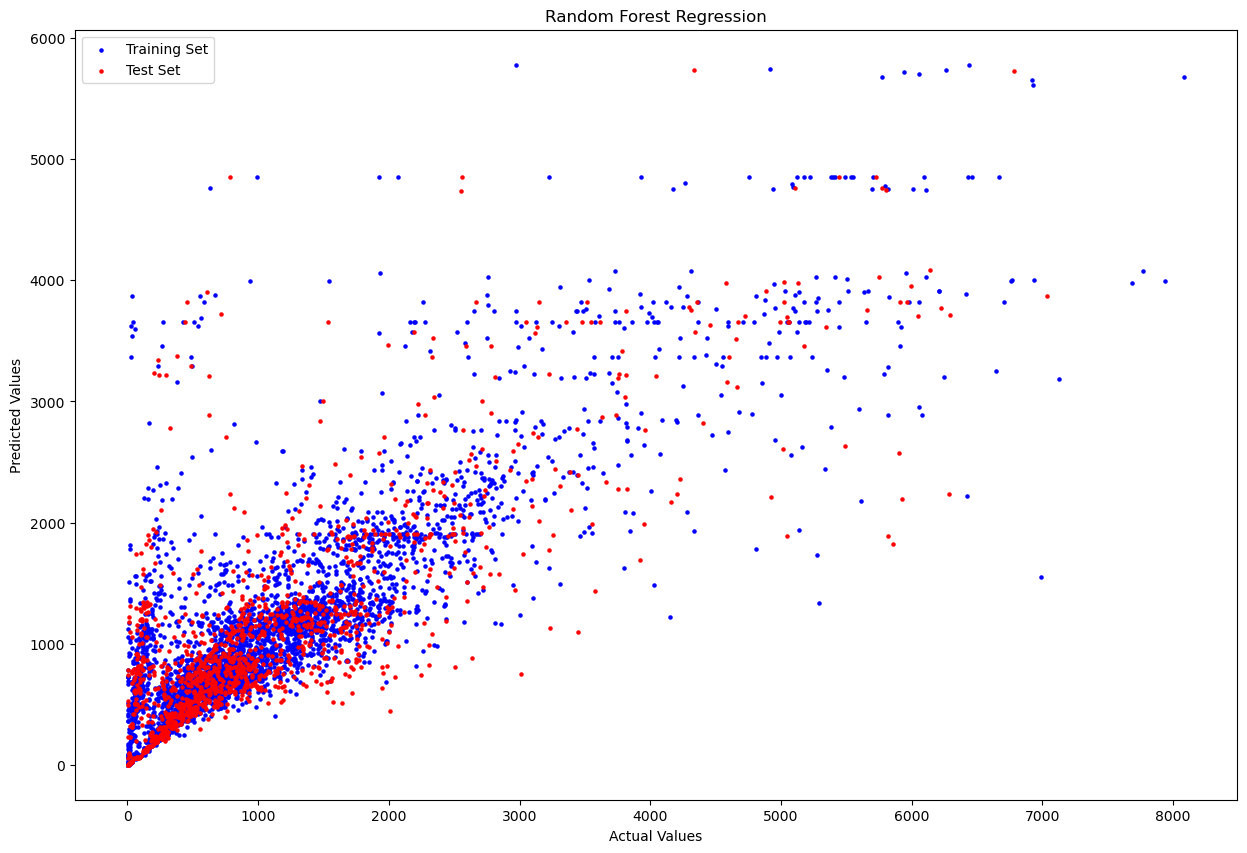

In [98]:
plt.figure(figsize=(15,10))
plt.scatter(y_train, best_model.predict(X_train), color='blue', label='Training Set', s=5)
plt.scatter(y_test, y_test_pred, color='red', label='Test Set', s=5)
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Visual of how Good our model fits. Overal good results. Let's check residuals.

<Figure size 1500x1000 with 0 Axes>

(array([  2.,   3.,   3.,   2.,   1.,   3.,  11.,  25.,  37.,  70., 116.,
        409., 252., 150.,  96.,  57.,  43.,  25.,  14.,  13.,   8.,  11.,
          7.,   2.,   3.,   3.,   3.,   1.,   0.,   4.]),
 array([-3029.94139563, -2789.46955843, -2548.99772123, -2308.52588403,
        -2068.05404683, -1827.58220963, -1587.11037244, -1346.63853524,
        -1106.16669804,  -865.69486084,  -625.22302364,  -384.75118644,
         -144.27934924,    96.19248796,   336.66432516,   577.13616236,
          817.60799956,  1058.07983675,  1298.55167395,  1539.02351115,
         1779.49534835,  2019.96718555,  2260.43902275,  2500.91085995,
         2741.38269715,  2981.85453435,  3222.32637155,  3462.79820874,
         3703.27004594,  3943.74188314,  4184.21372034]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Histogram of Residuals')

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

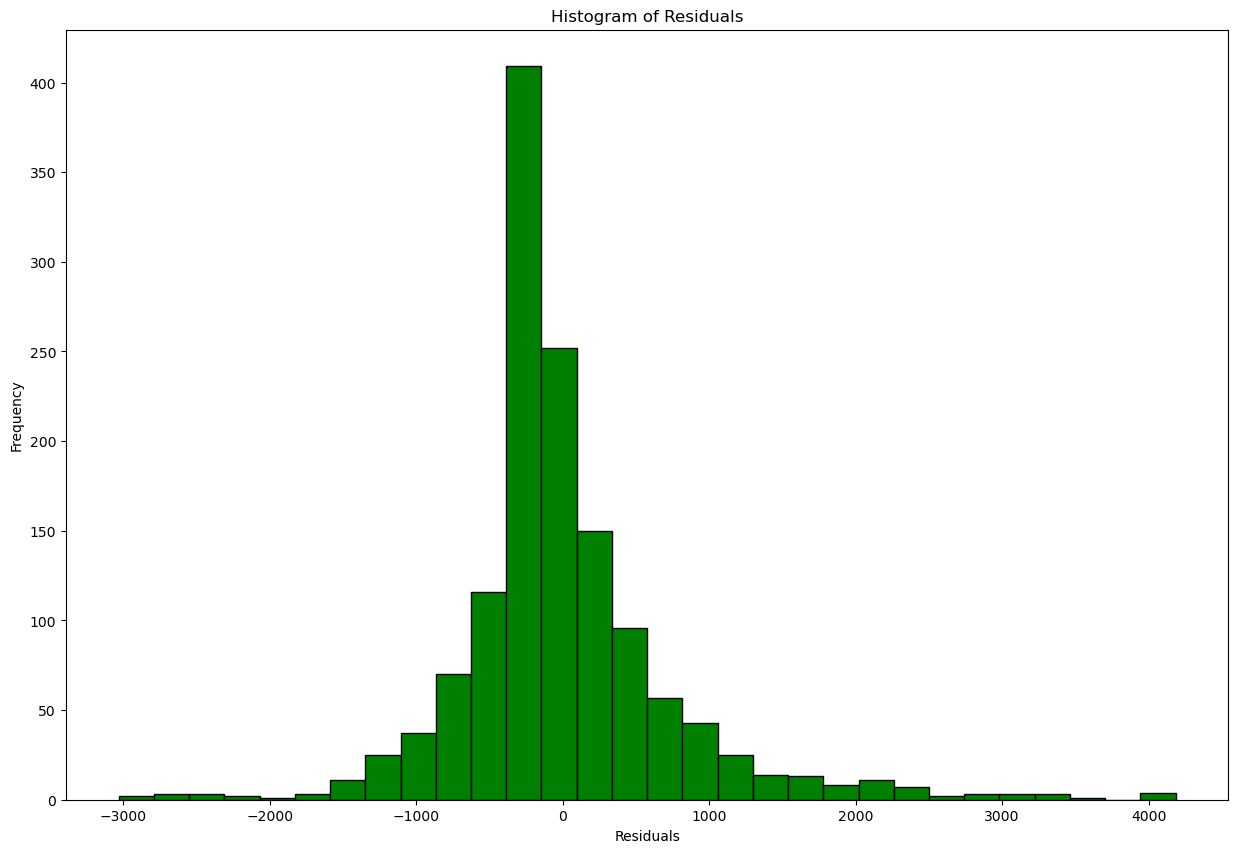

In [122]:
plt.figure(figsize=(15,10))
plt.hist(residuals, bins=30, color='green', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


##### Histogramm of residual destribution. 
- The residuals are spread relatively evenly across the range of predicted values, it suggests homoscedasticity.
- The errors are normally distributed.
- The residuals that are centered around zero represent a well-fitted model.
- Outliers in the residuals may indicate data points that the model is not capturing well. Will need to be investigated.

## Now lets check Gradient Boosting

In [109]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Initialize scalers
scalers = {
    'No Scaler': None,
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Create a pipeline with the Gradient Boosting model
model = Pipeline([
    ('scaler', None), 
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
for scaler_name, scaler in scalers.items():
    # Set the scaler in the pipeline
    model.set_params(scaler=scaler)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    best_model_gb = grid_search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model_gb.predict(X_validation)

    # Calculate metrics
    train_score = best_model_gb.score(X_train, y_train)
    mse = mean_squared_error(y_validation, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)

    # Append metrics to the dictionary
    metrics['Model'].append('Gradient Boosting (Tuned)')
    metrics['Scaler'].append(scaler_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


Pipeline(steps=[('scaler', None), ('model', GradientBoostingRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', GradientBoostingRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', GradientBoostingRegressor())])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

                       Model           Scaler            MSE        RMSE  \
0  Gradient Boosting (Tuned)        No Scaler  618887.985976  786.694341   
1  Gradient Boosting (Tuned)  Standard Scaler  603141.921831  776.622123   
2  Gradient Boosting (Tuned)    MinMax Scaler  618035.820847  786.152543   
3  Gradient Boosting (Tuned)    Robust Scaler  625585.736934  790.939781   

          MAE  R2 Score  Train Score  
0  493.722273  0.551209     0.815258  
1  477.560888  0.562627     0.863834  
2  489.249066  0.551827     0.866058  
3  492.033540  0.546352     0.851115  


In [110]:
# Looking lower score difference betwen R2 on train and validation
metrics_df['Score Difference'] = metrics_df['R2 Score'] - metrics_df['Train Score']

# Display
print(metrics_df)


                       Model           Scaler            MSE        RMSE  \
0  Gradient Boosting (Tuned)        No Scaler  618887.985976  786.694341   
1  Gradient Boosting (Tuned)  Standard Scaler  603141.921831  776.622123   
2  Gradient Boosting (Tuned)    MinMax Scaler  618035.820847  786.152543   
3  Gradient Boosting (Tuned)    Robust Scaler  625585.736934  790.939781   

          MAE  R2 Score  Train Score  Score Difference  
0  493.722273  0.551209     0.815258         -0.264049  
1  477.560888  0.562627     0.863834         -0.301206  
2  489.249066  0.551827     0.866058         -0.314231  
3  492.033540  0.546352     0.851115         -0.304763  


In [111]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 300}


##### Gradient Boosting with no Scaler has better score difference between R2 and Train score. Lower score difference, better fit for actual and predicted values have

##### Let's try to tune hyperparameters to get better result

In [58]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25, 50, 75],
    'model__learning_rate': [0.1],
    'model__max_depth': [None, 2, 4],
    'model__min_samples_split': [20, 30, 40],
    'model__min_samples_leaf': [2, 4],
    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.1],
                         'model__max_depth': [None, 2, 4],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_leaf': [2, 4],
                         'model__min_samples_split': [20, 30, 40],
                         'model__n_estimators': [25, 50, 75]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  542107.893311  736.279766  470.746331   

   R2 Score  Train Score  
0  0.565162     0.924387  
Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 40, 'model__n_estimators': 50}


High Trains score and low Validation score, not a good fit.

Keep tuning. We can try known hyperparameters.

In [66]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__learning_rate': [0.1],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.1],
                         'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  516784.187129  718.877032  439.640738   

   R2 Score  Train Score  
0  0.585475     0.864664  
Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}


WE improve our results, lets keep tuning

In [69]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__learning_rate': [0.05],
    'model__max_depth': [None],
    'model__min_samples_split': [35],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.05],
                         'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [35],
                         'model__n_estimators': [25]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  549989.103103  741.612502  483.823802   

   R2 Score  Train Score  
0   0.55884     0.716617  
Best Hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 35, 'model__n_estimators': 25}


WE reduced difference between R2 score. That's good.

In [70]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__learning_rate': [0.05],
    'model__max_depth': [None],
    'model__min_samples_split': [40],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.05],
                         'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [40],
                         'model__n_estimators': [25]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  546096.671288  738.983539  483.548416   

   R2 Score  Train Score  
0  0.561963      0.70297  
Best Hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 40, 'model__n_estimators': 25}


Improved again, keep going

In [103]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'model__n_estimators': [25],
    'model__learning_rate': [0.05],
    'model__max_depth': [None],
    'model__min_samples_split': [45],
    'model__min_samples_leaf': [4],
#    'model__max_features': ['sqrt']
}

# Create a pipeline with the Gradient Boosting model (without scaler)
model = Pipeline([
    ('model', gb_model)
])

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'Scaler': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train Score': []
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)
best_model_gb = grid_search.best_estimator_

# Make predictions on the validation set
y_pred = best_model_gb.predict(X_validation)

# Calculate metrics
train_score = best_model_gb.score(X_train, y_train)
mse = mean_squared_error(y_validation, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

# Append metrics to the dictionary
metrics['Model'].append('Gradient Boosting (Tuned)')
metrics['Scaler'].append('None')  # No scaler
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train Score'].append(train_score)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)
print("Best Hyperparameters:", grid_search.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.05],
                         'model__max_depth': [None],
                         'model__min_samples_leaf': [4],
                         'model__min_samples_split': [45],
                         'model__n_estimators': [25]},
             scoring='r2')

                       Model Scaler            MSE        RMSE         MAE  \
0  Gradient Boosting (Tuned)   None  542269.840937  736.389734  483.577927   

   R2 Score  Train Score  
0  0.565032     0.698126  
Best Hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 45, 'model__n_estimators': 25}


In [105]:
# Make predictions on the test set
y_test_pred = best_model_gb.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Metrics:")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"R2 Score: {test_r2}")
print(f"\nTrain Score: {train_score}")


Test Metrics:
MSE: 549741.1937931281
RMSE: 741.4453410691365
MAE: 489.6525453289211
R2 Score: 0.5832421823768374

Train Score: 0.6981255451157116


Good results, we increased Validation score and reduced Train score. But Random Forest model has better result.

In [14]:
# Assuming you have already trained your pipeline named 'best_model_rf'
# Access the final estimator (Random Forest Regressor) from the pipeline
rf_estimator = best_model_rf.named_steps['model']

# Get feature importances
feature_importances = rf_estimator.feature_importances_

# Create a DataFrame to better visualize feature importances
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the sorted feature importances
print(feature_importance_df)


                 Feature  Importance
9      Duration_category    0.152560
2              Shared_ID    0.069023
91       User_ID_AsO10-5    0.068022
113       User_ID_MS22-1    0.056180
70        Garage_ID_SR14    0.056058
..                   ...         ...
145     User_ID_Share-27    0.000000
150     User_ID_Share-31    0.000000
151     User_ID_Share-32    0.000000
152     User_ID_Share-33    0.000000
181  Start_plugin_minute    0.000000

[182 rows x 2 columns]


<Figure size 3000x1500 with 0 Axes>

<BarContainer object of 182 artists>

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Feature Importances')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

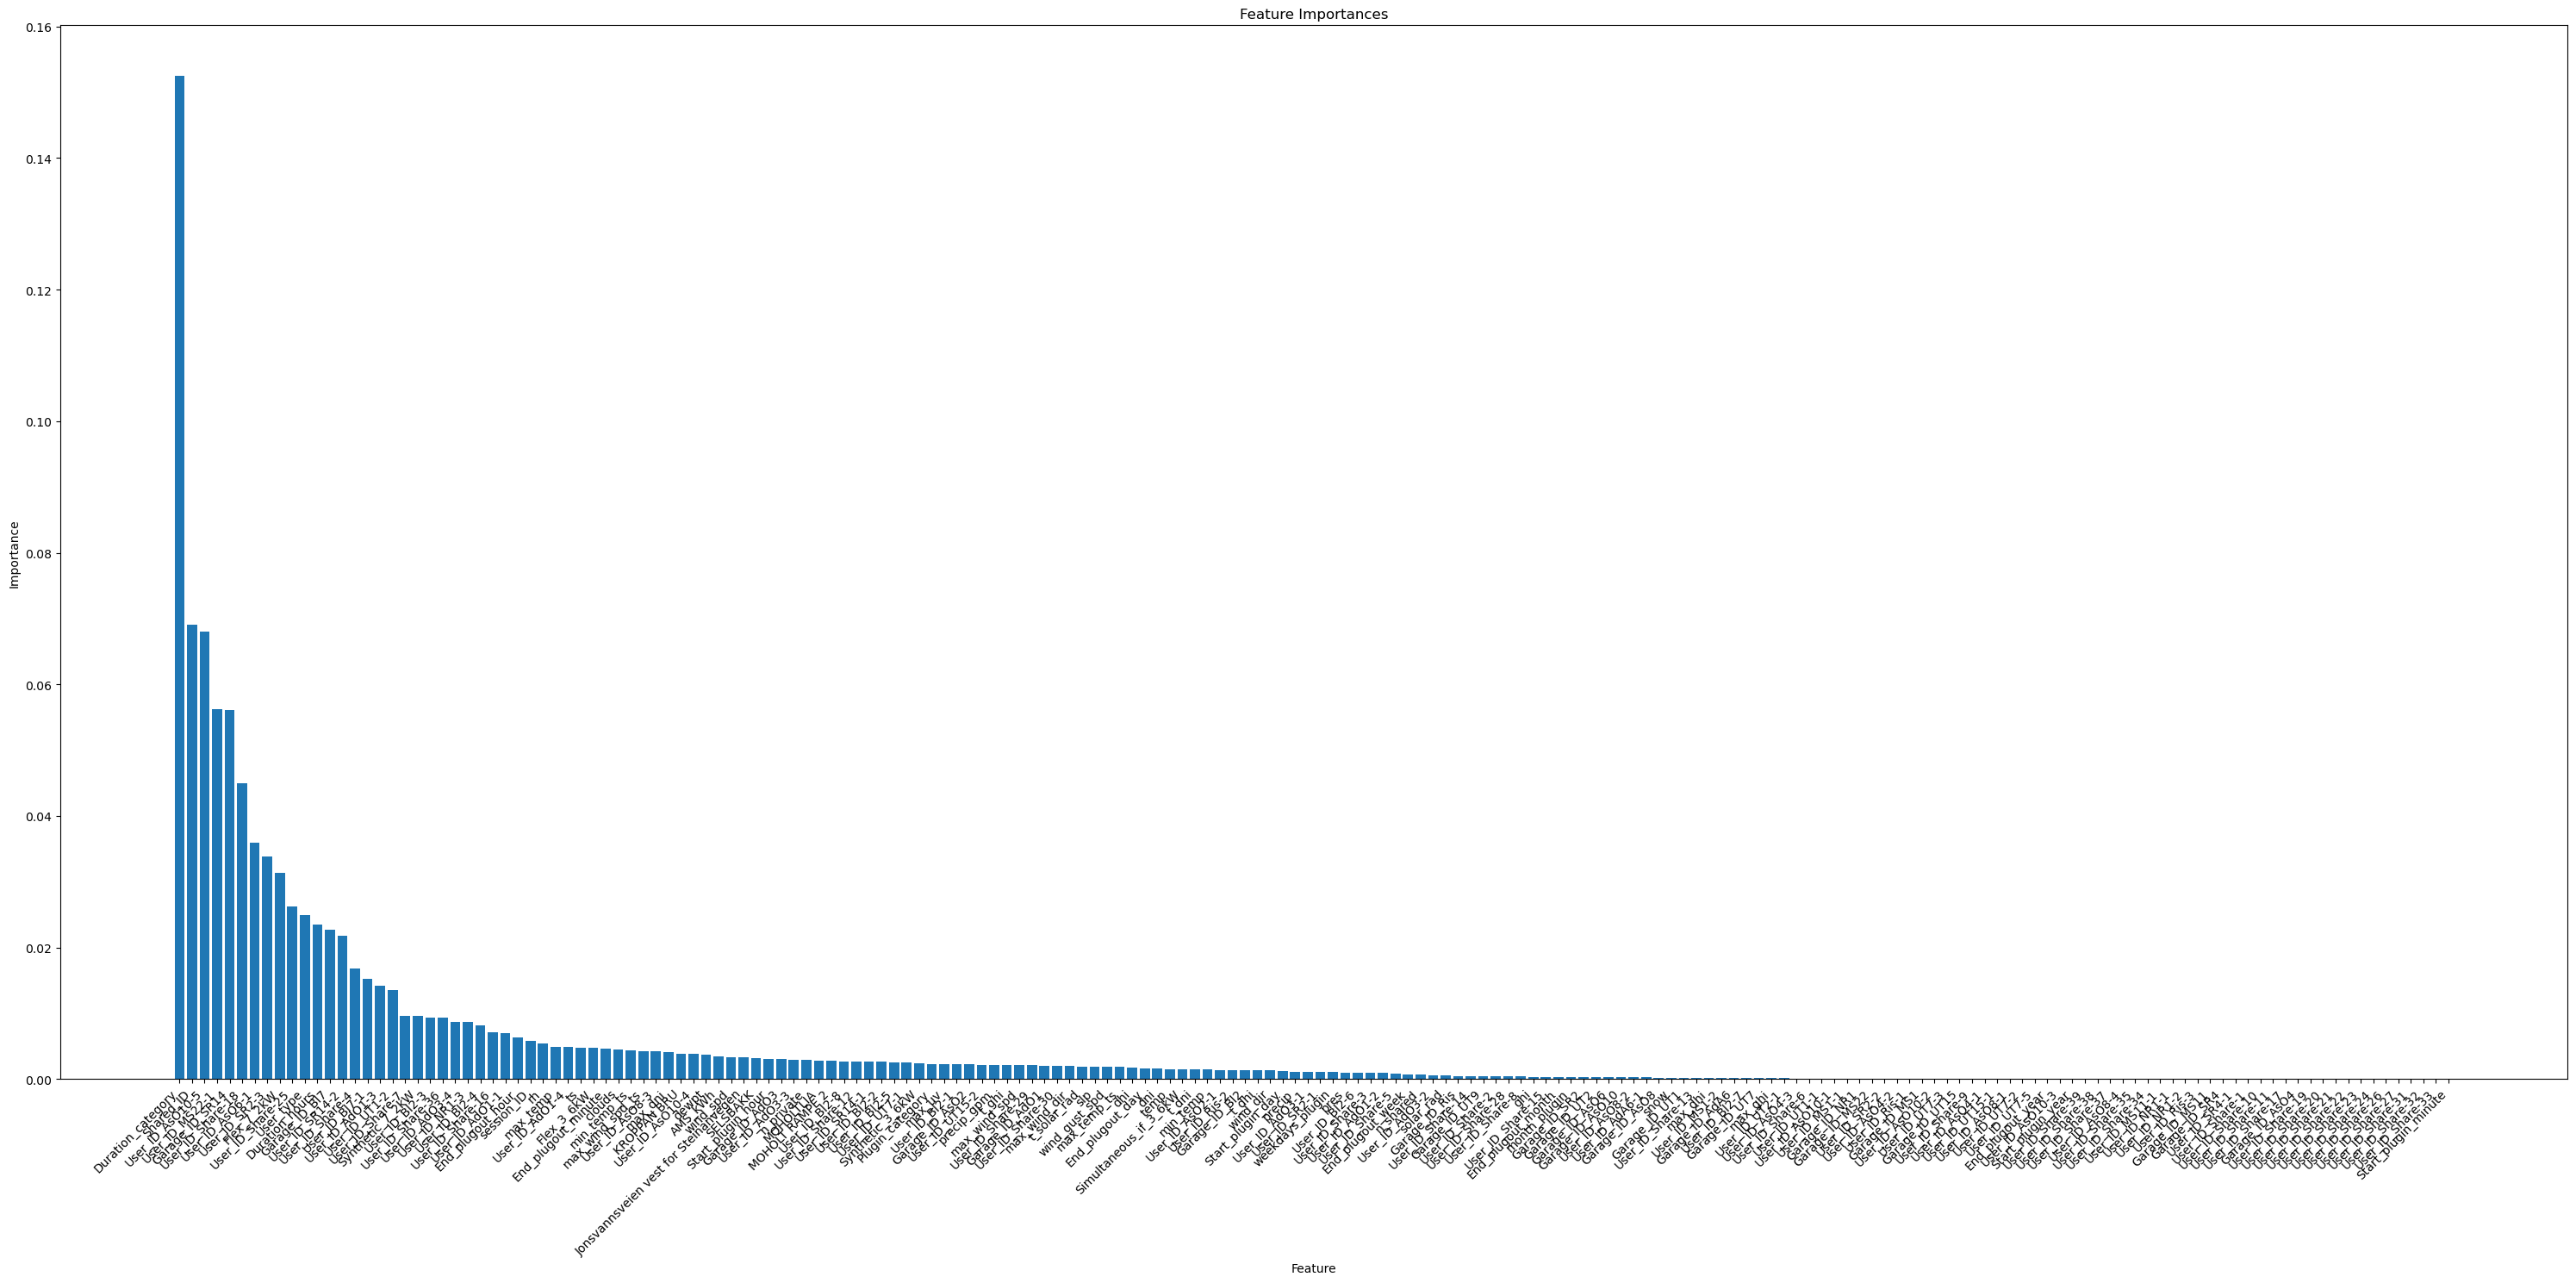

In [20]:
# Plotting feature importances
plt.figure(figsize=(30, 15))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [21]:
# Assuming you have already trained your model and made predictions
# Make sure y_test and y_pred have the same indices
y_test = y_test[:len(y_pred)]

# Calculate residuals (the differences between predicted and actual values)
residuals = y_test - y_pred

# Plotting residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Line at y=0 for reference
plt.show()

# Plotting a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print mean squared error (MSE) as an overall measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


ValueError: operands could not be broadcast together with shapes (1374,) (1648,) 